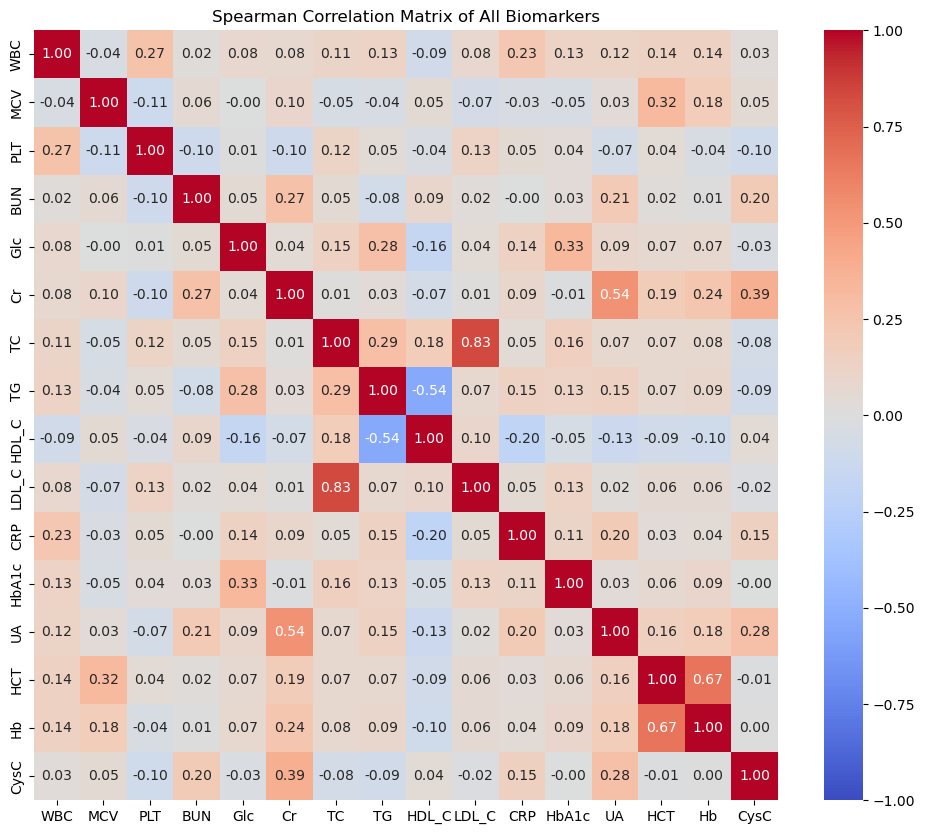

Highly correlated feature pairs (|ρ| > 0.7) for Spearman Correlation Matrix of All Biomarkers: [('LDL_C', 'TC')]
   


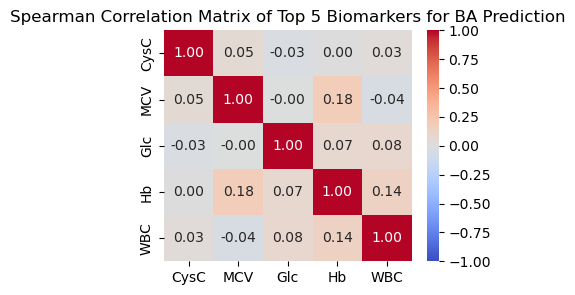

Highly correlated feature pairs (|ρ| > 0.7) for Spearman Correlation Matrix of Top 5 Biomarkers for BA Prediction: []
   


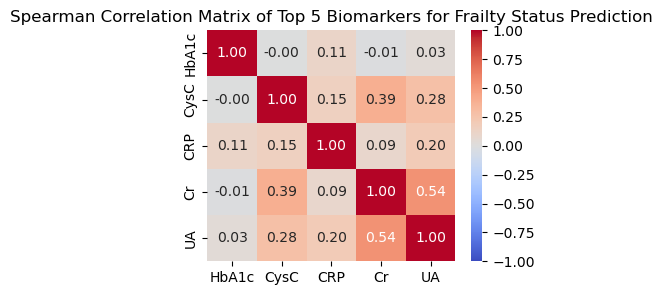

Highly correlated feature pairs (|ρ| > 0.7) for Spearman Correlation Matrix of Top 5 Biomarkers for Frailty Status Prediction: []
   


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def plot_correlation_matrix(data, features, title):
    """
    This function calculates the Spearman correlation matrix of the features,
    plots a heatmap, and outputs highly correlated feature pairs.
    :param data: DataFrame containing feature data
    :param features: List of features
    :param title: Title of the heatmap
    """
    df = data[features]
    # Calculate the Spearman correlation matrix
    corr_matrix = df.corr(method='spearman')
    # Adjust the figure size according to the number of features
    fig_size = (12, 10) if len(features) > 5 else (4, 3)
    plt.figure(figsize=fig_size)
    # Draw a heatmap
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")
    plt.title(title)
    plt.show()
    # Extract highly correlated pairs (|ρ| > 0.7)
    high_corr_pairs = [(i, j) for i in features for j in features if i < j and abs(corr_matrix[i][j]) > 0.7]
    print(f"Highly correlated feature pairs (|ρ| > 0.7) for {title}: {high_corr_pairs}")
    print("   ")


# Read the data
data = pd.read_csv('data2011.csv')

# All biomarkers
features = ['WBC', 'MCV', 'PLT', 'BUN', 'Glc', 'Cr', 'TC', 'TG', 'HDL_C',
            'LDL_C', 'CRP', 'HbA1c', 'UA', 'HCT', 'Hb', 'CysC']

# Top 5 features for BA and Frailty status prediction model
features_ba = ['CysC', 'MCV', 'Glc', 'Hb', 'WBC']
features_fr = ['HbA1c', 'CysC', 'CRP', 'Cr', 'UA']

# Plot the correlation matrix for all biomarkers
plot_correlation_matrix(data, features, "Spearman Correlation Matrix of All Biomarkers")
# Plot the correlation matrix for the top 5 biomarkers for BA prediction
plot_correlation_matrix(data, features_ba, "Spearman Correlation Matrix of Top 5 Biomarkers for BA Prediction")
# Plot the correlation matrix for the top 5 biomarkers for Frailty status prediction
plot_correlation_matrix(data, features_fr, "Spearman Correlation Matrix of Top 5 Biomarkers for Frailty Status Prediction")


